## Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, we will further investigate some comparisons between our personal logistic regression implementation, that of sci-kit learn and further tuning parameters that can be adjusted in the model.

## Objectives

* Understand and implement logistic regression
* Compare logistic model outputs

In the previous lab, we were able to recreat a logistic regression model output from sci-kit learn that did not include an intercept of regularization. Here, you will continue to analyze the impact of several tuning parameters including the intercept, and regularization parameter which we have not discussed previously.

## Importing the Data

As with the previous lab, import the dataset stored in **heart.csv**

In [1]:
#Your code here
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Problem Formulation

Define X and y as with the previous lab. This time, follow best practices and also implementk a standard train-test split.  
**For consistency of results, use random_state=17.**

In [4]:
#Your code here
from sklearn.model_selection import train_test_split

X = df[df.columns[:-1]]
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
print('Training Set Values:\n', y_train.value_counts(),'\n', 'Testing Set Values:\n', y_test.value_counts())

Training Set Values:
 1.0    130
0.0     97
Name: target, dtype: int64 
 Testing Set Values:
 0.0    41
1.0    35
Name: target, dtype: int64


## Initial Model - Personal Implementation

Use your code from the previous lab to once again train a logistic regression algorithm on the training set.

In [5]:
# Your code here
import numpy as np

def sigmoid(x):
    x = np.array(x)
    return 1 / (1 + np.e**(-1*x))

def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    weights = initial_weights
    #Create a for loop of iterations
    for iteration in range(max_iterations):
        #Generate predictions using the current feature weights
        predictions = sigmoid(np.dot(X,weights))
        #Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        #Calculate the gradient 
        #As we saw in the previous lab, calculating the gradient is often the most difficult task.
        #Here, your are provided with the closed form solution for the gradient of the log-loss function derived from MLE
        #For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(),error_vector)
        #Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
    #Return finalized Weights
    return weights

weights = grad_desc(X_train, y_train, 50000, 0.001)

## Now use your algorithm to make [probability] predictions on the test set

In [8]:
#Your code here
y_hat_test = sigmoid(np.dot(X_test, weights))
print('Test Set Predictions:\n', [round(y_i, 2) for y_i in y_hat_test])

Test Set Predictions:
 [0.96, 0.02, 0.09, 0.12, 0.0, 1.0, 0.25, 0.94, 0.0, 0.8, 0.04, 0.69, 0.53, 0.0, 0.99, 0.59, 0.69, 0.01, 0.99, 0.03, 0.98, 0.98, 0.03, 0.78, 0.76, 0.78, 0.0, 0.08, 0.02, 0.01, 0.74, 0.02, 0.99, 0.05, 0.35, 0.99, 0.85, 0.31, 0.78, 0.99, 0.97, 0.14, 0.0, 0.01, 0.96, 0.9, 0.98, 0.73, 0.02, 0.0, 0.98, 0.0, 0.0, 0.68, 0.85, 0.0, 0.66, 0.6, 0.01, 0.97, 0.07, 0.0, 0.98, 0.43, 0.91, 0.08, 0.81, 0.99, 0.01, 0.26, 0.68, 0.18, 0.98, 0.02, 0.96, 0.94]


## Create an ROC curve for your predictions

Testing Set AUC = 0.8996515679442508


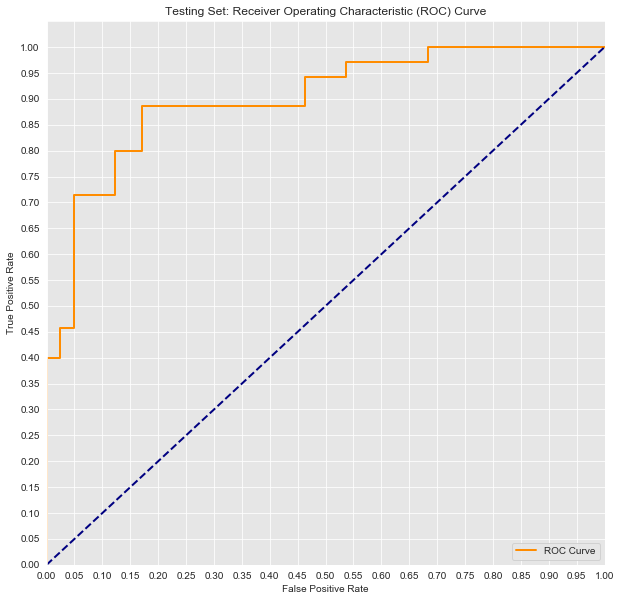

In [10]:
#Your code here
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_hat_test)
print('Testing Set AUC = {}'.format(auc(fpr, tpr)))

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing Set: Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Update your ROC curve to not only include a graph of the test set, but one of the train set

Testing Set AUC = 0.8996515679442508
Training Set AUC = 0.9291038858049168


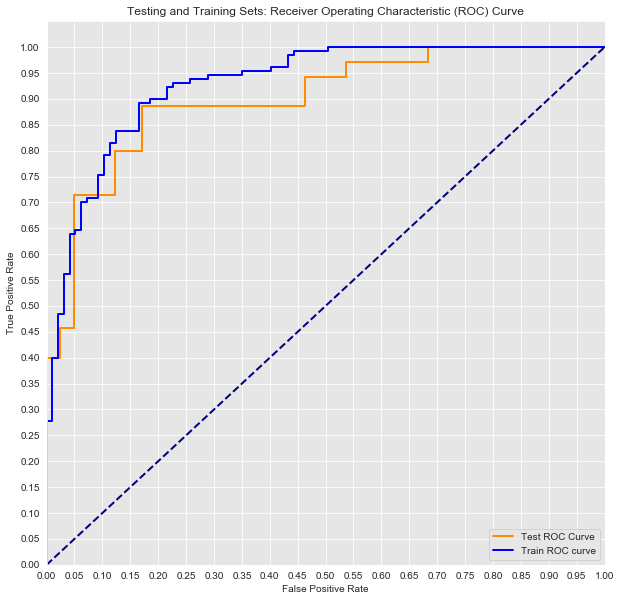

In [11]:
# Your code here
y_hat_train = sigmoid(np.dot(X_train, weights))

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_hat_train)
print('Testing Set AUC = {}'.format(auc(test_fpr, test_tpr)))
print('Training Set AUC = {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(10,10))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange', lw=lw, label='Test ROC Curve')
plt.plot(train_fpr, train_tpr, color='blue', lw=lw, label='Train ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing and Training Sets: Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Create a confusion matrix for your predictions

Use a standard decision boundary of .5 to convert your probabilities output by logistic regression into binary classifications. (Again this should be for the test set.) Afterwards, feel free to use the built in sci-kit learn methods to compute the confusion matrix as we discussed in previous sections.

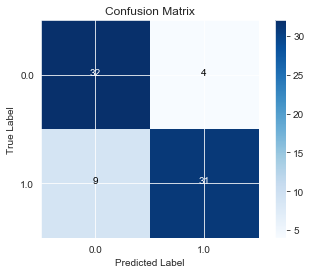

In [14]:
# Your code here
# Convert to Binary Classification
import itertools

def binary_prediction(probabilities, threshold=.5):
    classes = []
    for p in probabilities:
        if p >= threshold:
            classes.append(1)
        else:
            classes.append(0)
    return classes
test_predictions = binary_prediction(y_hat_test)

# Build Confusion Matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(test_predictions, y_test)
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
class_names = set(y)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
thresh = cnf_matrix.max() / 2. 
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j], horizontalalignment="center", color="white" if cnf_matrix[i, j] > thresh else "black")
plt.colorbar()

## Initial Model - sci-kit learn

Do the same using the built in method from sci-kit learn. To start, create an identical model as you did in the last section; turn off the intercept and set the regularization parameter, C, to a ridiculously large number such as 1e16. 

In [15]:
# Your code here
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e16)
logreg.fit(X_train, y_train)

C:\Users\IBM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1e+16, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

## Create an ROC Curve for the sci-kit learn model

Sci-kit Learn Model AUC = 0.8996515679442508


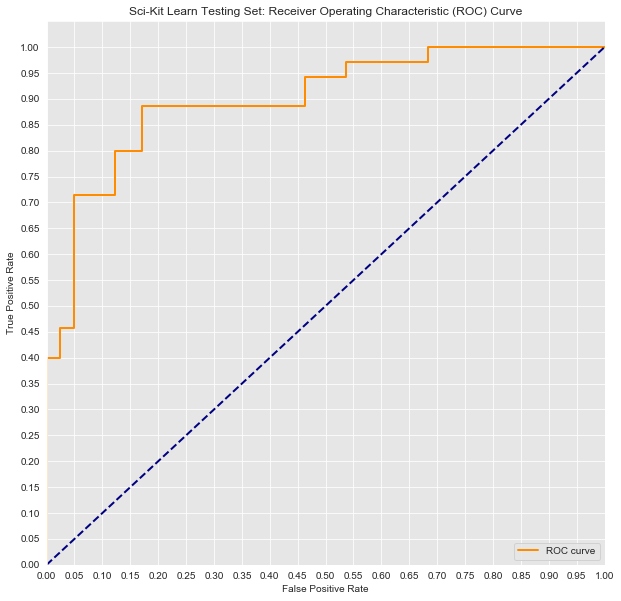

In [16]:
#Your code here
y_score = logreg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('Sci-kit Learn Test Model AUC = {}'.format(auc(fpr, tpr)))

plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Test ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Sci-Kit Learn Testing Set: Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## As before add an ROC curve to the graph for the train set as well

Sci-kit Learn Test Model AUC = 0.8996515679442508
Sci-kit Learn Train Model AUC = 0.9291038858049168


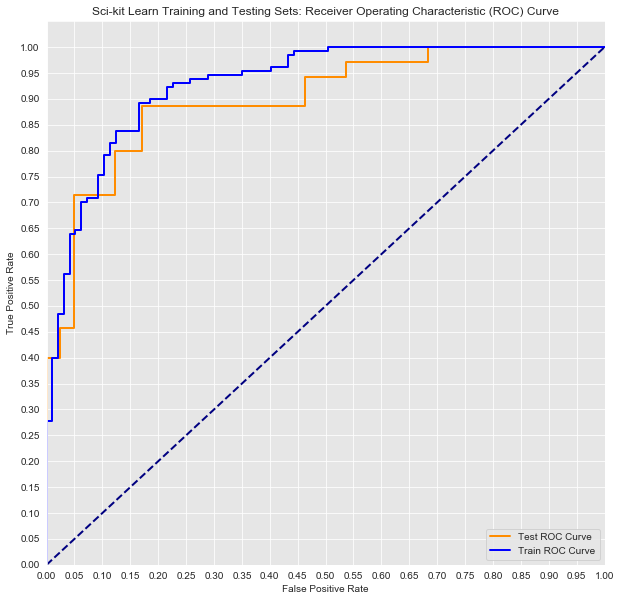

In [17]:
#Your code here
y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Sci-kit Learn Test Model AUC = {}'.format(auc(test_fpr, test_tpr)))
print('Sci-kit Learn Train Model AUC = {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(10,10))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange', lw=lw, label='Test ROC Curve')
plt.plot(train_fpr, train_tpr, color='blue', lw=lw, label='Train ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Sci-kit Learn Training and Testing Sets: Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Adding an Intercept

Now add an intercept to the sci-kit learn model. Keep the regularization parameter C set to a very large number such as 1e16. Plot all three models ROC curves on the same graph.

C:\Users\IBM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Built Model Test AUC = 0.8996515679442508
Built Model Train AUC = 0.9291038858049168
Sci-kit Model without Intercept Test AUC: 0.8996515679442508
Sci-kit Model without Intercept Train AUC: 0.9291038858049168
Sci-kit Model with Interecept Test AUC = 0.8989547038327527
Sci-kit Model with Intercept Train AUC = 0.9325931800158604


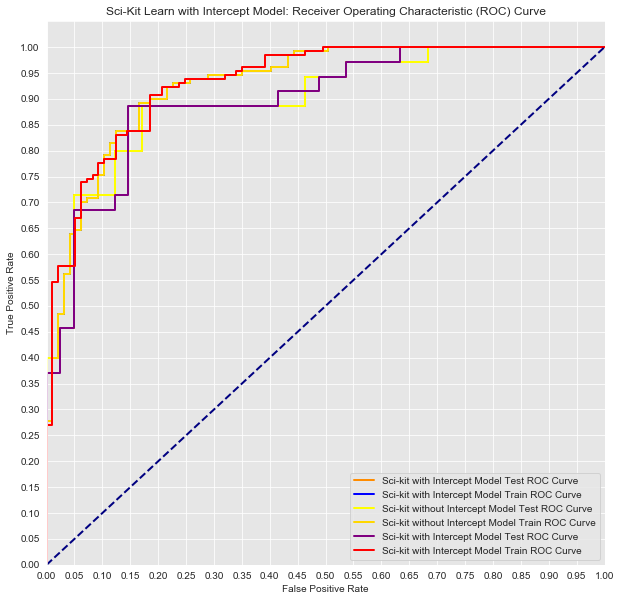

In [18]:
# Your code here
# Model
logreg_int = LogisticRegression(fit_intercept=True, C=1e16)
logreg_int.fit(X_train, y_train)
# First Model Plots
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_hat_train)
print('Built Model Test AUC = {}'.format(auc(test_fpr, test_tpr)))
print('Built Model Train AUC = {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(10,10))
lw = 2
plt.plot(test_fpr, test_tpr, color='darkorange', lw=lw, label='Sci-kit with Intercept Model Test ROC Curve')
plt.plot(train_fpr, train_tpr, color='blue', lw=lw, label='Sci-kit with Intercept Model Train ROC Curve')

# Second Model Plots
y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
print('Sci-kit Model without Intercept Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Sci-kit Model without Intercept Train AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, color='yellow', lw=lw, label='Sci-kit without Intercept Model Test ROC Curve')
plt.plot(train_fpr, train_tpr, color='gold', lw=lw, label='Sci-kit without Intercept Model Train ROC Curve')


# Third Model Plots
y_test_score = logreg_int.decision_function(X_test)
y_train_score = logreg_int.decision_function(X_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
print('Sci-kit Model with Interecept Test AUC = {}'.format(auc(test_fpr, test_tpr)))
print('Sci-kit Model with Intercept Train AUC = {}'.format(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, color='purple', lw=lw, label='Sci-kit with Intercept Model Test ROC Curve')
plt.plot(train_fpr, train_tpr, color='red', lw=lw, label='Sci-kit with Intercept Model Train ROC Curve')

# Plotting
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Sci-Kit Learn with Intercept Model: Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At minimum, create 5 different subplots with varying regularization (C) parameters. For each, plot the ROC curve of the train and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and train auc as you go along.

C:\Users\IBM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IBM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IBM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IBM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IBM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

Test AUC for C = 1.5^0 = 0.9094076655052264
Train AUC for C = 1.5^0 = 0.9221252973830293
Test AUC for C = 1.5^2 = 0.9059233449477352
Train AUC for C = 1.5^2 = 0.9249008723235527
Test AUC for C = 1.5^4 = 0.9059233449477352
Train AUC for C = 1.5^4 = 0.9256145915939731
Test AUC for C = 1.5^6 = 0.9052264808362369
Train AUC for C = 1.5^6 = 0.9287073750991277
Test AUC for C = 1.5^8 = 0.9052264808362369
Train AUC for C = 1.5^8 = 0.9303727200634417
Test AUC for C = 1.5^10 = 0.9059233449477352
Train AUC for C = 1.5^10 = 0.9314036478984933
Test AUC for C = 1.5^12 = 0.9052264808362369
Train AUC for C = 1.5^12 = 0.9321173671689136
Test AUC for C = 1.5^14 = 0.9031358885017422
Train AUC for C = 1.5^14 = 0.9318001586042823
Test AUC for C = 1.5^16 = 0.9010452961672474
Train AUC for C = 1.5^16 = 0.9324345757335448
Test AUC for C = 1.5^18 = 0.8996515679442509
Train AUC for C = 1.5^18 = 0.9325138778747026


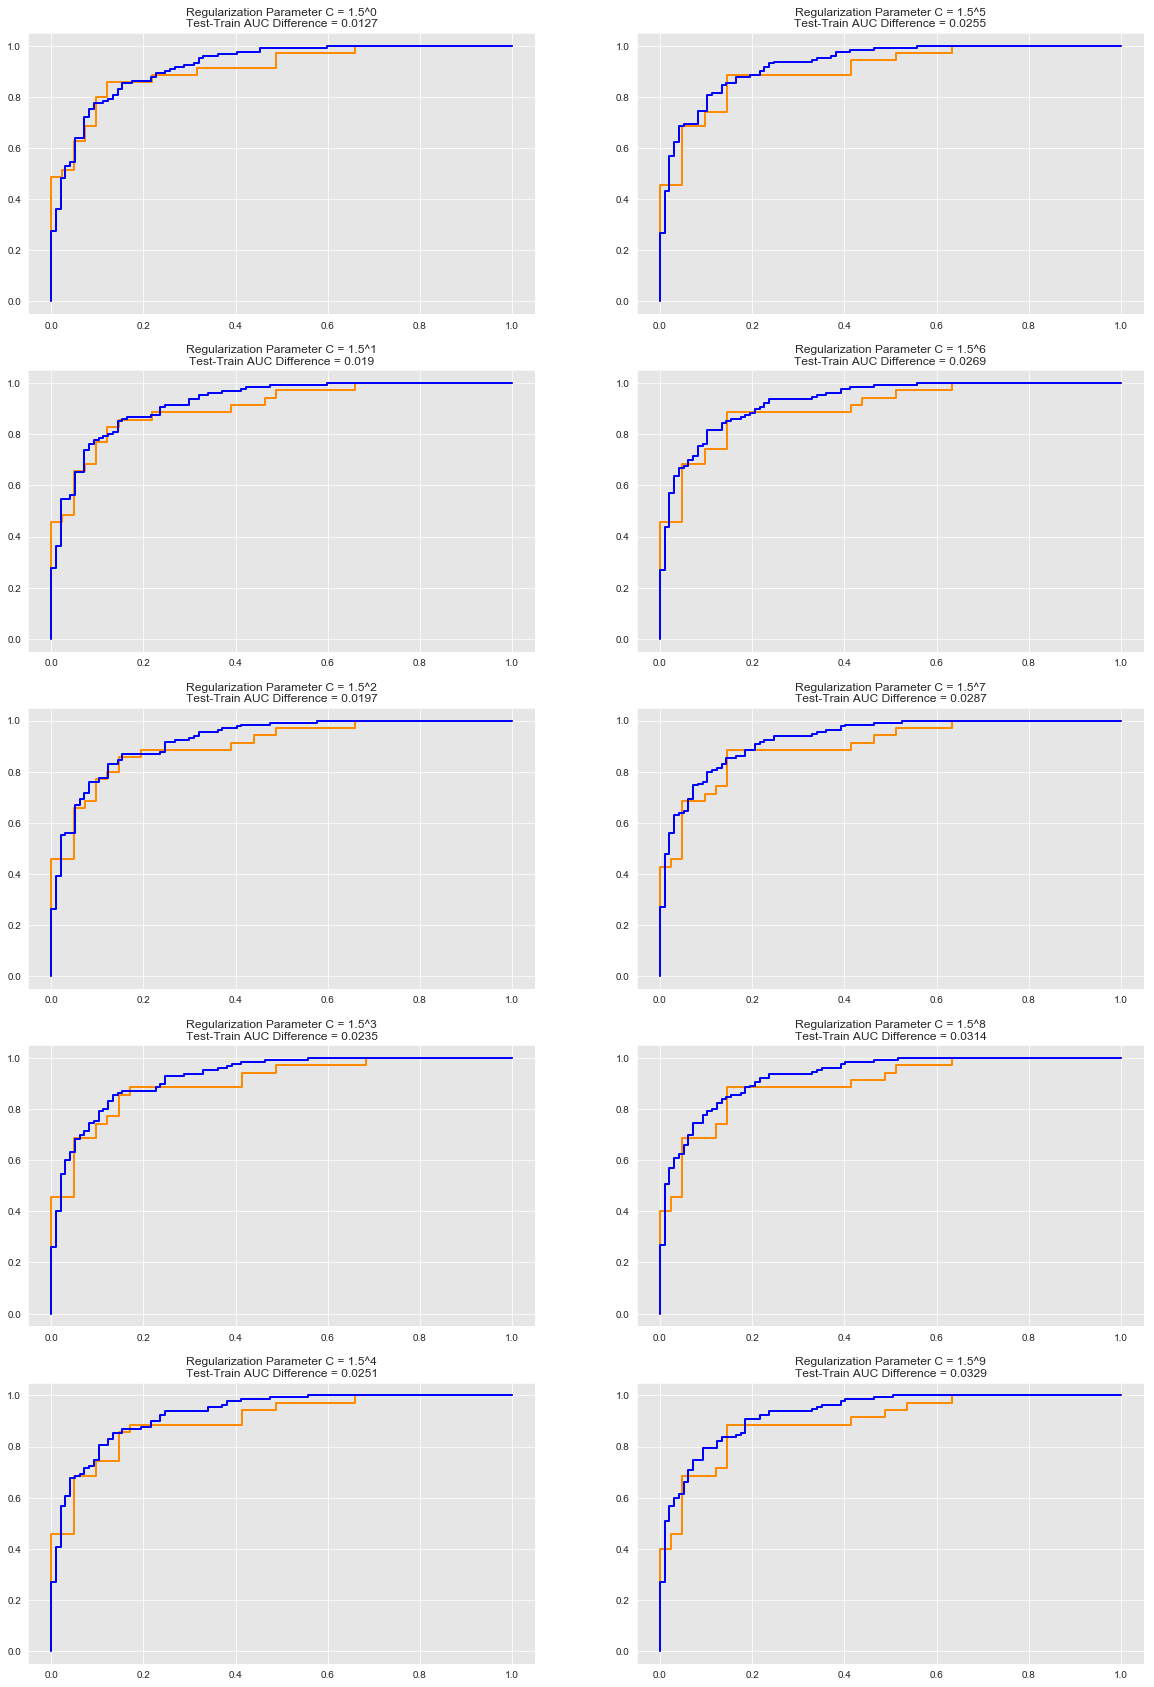

In [30]:
# Your code here
fig, axes = plt.subplots(5, 2, figsize=(20,30))
for n in range(10):
    i = n%5
    j = n//5
    ax = axes[i,j]
    # Model
    logreg = LogisticRegression(fit_intercept=True, C=1.5**(n))
    logreg.fit(X_train, y_train)
    y_train_score = logreg.decision_function(X_train)
    y_test_score = logreg.decision_function(X_test)
    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    auc_diff = round(train_auc - test_auc, 4)
    print('Test AUC for C = 1.5^{} = {}'.format(n*2, auc(test_fpr, test_tpr)))
    print('Train AUC for C = 1.5^{} = {}'.format(n*2, auc(train_fpr, train_tpr)))
    # Add the plot
    ax.plot(test_fpr, test_tpr, color='darkorange', lw=lw, label='Test ROC Curve')
    ax.plot(train_fpr, train_tpr, color='blue', lw=lw, label='train ROC curve')    
    ax.set_title('Regularization Parameter C = 1.5^{}\nTest-Train AUC Difference = {}'.format(n, auc_diff))

## Comment on how the Regularization Parameter Impacts the ROC curves plotted above

#Your response here
Regularization decreses as the C parameter increases. This leads to small increases in the difference between Test and Train AUC, an indicator of model overfitting.

## Summary

In this lesson, we reviewed many of the accuracy measures of classification algorithms and observed the impact of additional tuning parameters such as regularization. In the final lessons of this section we will investigate one last method for visualizing our models which can be a useful tool for presenting your model outputs to a non-technical audience.
